In [1]:
# 数据处理
import pandas as pd
import numpy as np
 
# 绘图
import seaborn as sns
import matplotlib.pyplot as plt
# 因子分析
from factor_analyzer import FactorAnalyzer

In [8]:
df = pd.read_csv("D:\\本基\\投稿\\数据\\train1.csv",encoding='gbk')
#df

In [28]:
df = pd.read_csv("D:\\本基\\投稿\\数据\\train1.csv", index_col=11,encoding='gbk').reset_index(drop=True)
#df

In [29]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
 
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value


(50001.78347924225, 0.0)

In [30]:
#KMO检验
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.668472732129223

In [31]:
faa = FactorAnalyzer(25,rotation=None)
faa.fit(df)
 
# 得到特征值ev、特征向量v
ev,v=faa.get_eigenvalues()
print(ev,v)

[3.33782897 1.40417645 1.19883687 1.01630272 0.9965953  0.95918892
 0.72901068 0.63768483 0.45221226 0.20664883 0.06151417] [ 3.18396476e+00  1.00897260e+00  6.43672880e-01  5.70629435e-01
  2.82590349e-01  1.41421901e-01  9.00511665e-02  4.51806810e-02
  2.13107009e-02  1.70275237e-02 -1.78259636e-05]


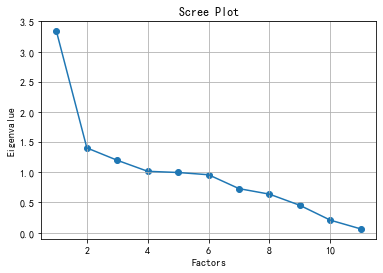

In [32]:
 # 同样的数据绘制散点图和折线图
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)
 
# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
 
plt.grid()  # 显示网格
plt.show()  # 显示图形

In [33]:
import matplotlib as mpl
 
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题


In [34]:
# 选择方式： varimax 方差最大化
# 选择固定因子为 6 个
faa_two = FactorAnalyzer(6,rotation='varimax')
faa_two.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [35]:
# 公因子方差
faa_two.get_communalities()

array([9.01585569e-01, 2.49771407e-01, 8.15336094e-01, 9.95045307e-01,
       9.57167984e-01, 6.55912468e-04, 9.95112889e-01, 8.35832347e-01,
       1.03658554e-01, 3.65565009e-01, 4.67116085e-01])

In [36]:
pd.DataFrame(faa_two.get_communalities(),index=df.columns)

,0
ID,0.901586
category,0.249771
lnfans,0.815336
lnlikes,0.995045
lnviewers_y,0.957168
date,0.000656
count,0.995113
lnviewers_x,0.835832
sum,0.103659
customer_unit_price,0.365565


In [37]:
#旋转后特征值
faa_two.get_eigenvalues()

(array([3.33782897, 1.40417645, 1.19883687, 1.01630272, 0.9965953 ,
        0.95918892, 0.72901068, 0.63768483, 0.45221226, 0.20664883,
        0.06151417]),
 array([ 3.19222072e+00,  1.16785259e+00,  8.78229784e-01,  7.89300991e-01,
         4.17420971e-01,  2.41959647e-01,  2.57401597e-02,  1.18661734e-02,
         2.30454372e-03, -1.17226780e-02, -2.83257449e-02]))

In [38]:
pd.DataFrame(faa_two.get_eigenvalues())

,0,1,2,3,4,5,6,7,8,9,10
0,3.337829,1.404176,1.198837,1.016303,0.996595,0.959189,0.729011,0.637685,0.452212,0.206649,0.061514
1,3.192221,1.167853,0.878230,0.789301,0.417421,0.241960,0.025740,0.011866,0.002305,-0.011723,-0.028326


In [39]:
#成分矩阵
# 变量个数*因子个数
faa_two.loadings_
pd.DataFrame(faa_two.loadings_,index=df.columns)

,0,1,2,3,4,5
ID,-0.939916,-0.095905,-0.046166,0.000601,-0.080675,0.017498
category,-0.203394,0.417296,0.101331,-0.126524,0.081189,0.037396
lnfans,0.133310,-0.153584,0.077653,0.874819,0.005279,0.051091
lnlikes,0.201733,0.128254,0.959857,0.006239,0.124029,0.033943
lnviewers_y,0.907302,-0.021547,0.192269,0.148202,0.272975,-0.007702
date,0.005610,0.003073,-0.001331,-0.000332,0.018811,-0.016102
count,0.339623,0.898629,0.013397,0.190581,-0.174443,-0.072827
lnviewers_x,0.667346,-0.105254,0.189555,0.233866,0.530489,0.085793
sum,0.015326,0.085567,-0.032317,0.276524,0.093009,-0.099705
customer_unit_price,0.040215,0.014382,0.010565,-0.070748,-0.066503,0.595148


In [40]:
#总方差贡献
faa_two.get_factor_variance()

(array([2.45496446, 1.05682169, 1.05259066, 1.01126222, 0.71732959,
        0.39387853]),
 array([0.22317859, 0.0960747 , 0.09569006, 0.09193293, 0.06521178,
        0.03580714]),
 array([0.22317859, 0.31925329, 0.41494335, 0.50687628, 0.57208806,
        0.6078952 ]))

### 6.隐藏变量可视化
### 为了更直观地观察每个隐藏变量和哪些特征的关系比较大，进行可视化展示，为了方便取上面相关系数的绝对值：

In [41]:
df1 = pd.DataFrame(np.abs(faa_two.loadings_),index=df.columns)
print(df1)

                            0         1         2         3         4  \
ID                   0.939916  0.095905  0.046166  0.000601  0.080675   
category             0.203394  0.417296  0.101331  0.126524  0.081189   
lnfans               0.133310  0.153584  0.077653  0.874819  0.005279   
lnlikes              0.201733  0.128254  0.959857  0.006239  0.124029   
lnviewers_y          0.907302  0.021547  0.192269  0.148202  0.272975   
date                 0.005610  0.003073  0.001331  0.000332  0.018811   
count                0.339623  0.898629  0.013397  0.190581  0.174443   
lnviewers_x          0.667346  0.105254  0.189555  0.233866  0.530489   
sum                  0.015326  0.085567  0.032317  0.276524  0.093009   
customer_unit_price  0.040215  0.014382  0.010565  0.070748  0.066503   
lnsales              0.293103  0.082683  0.196469  0.188300  0.537612   

                            5  
ID                   0.017498  
category             0.037396  
lnfans               0.0510

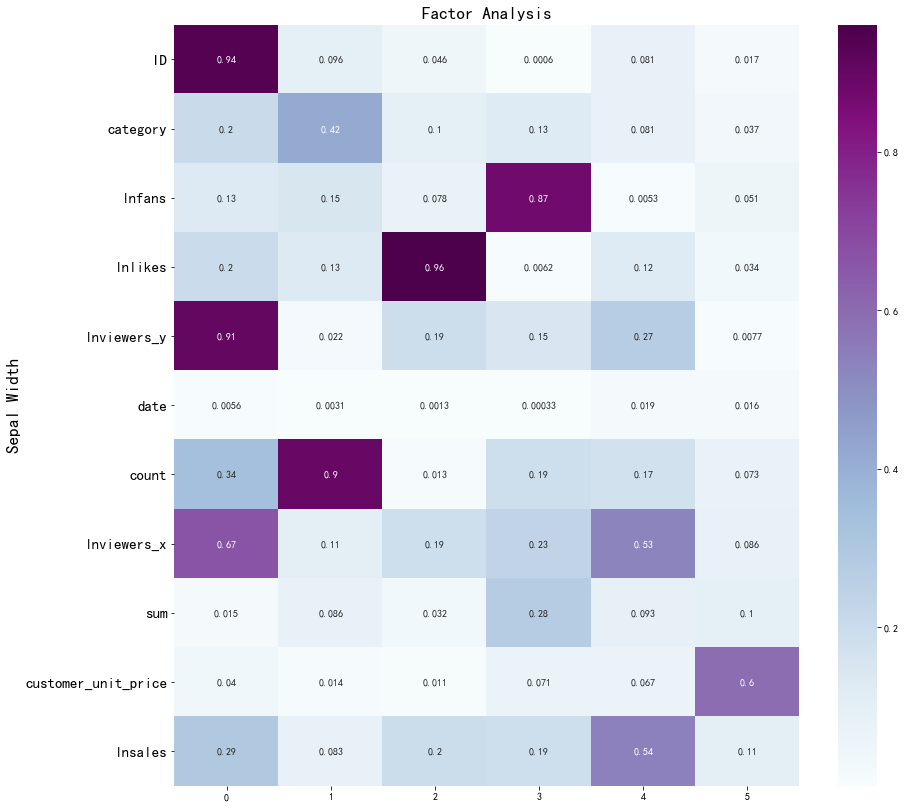

In [42]:
# 绘图
 
plt.figure(figsize = (14,14))
ax = sns.heatmap(df1, annot=True, cmap="BuPu")
 
# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")
 
# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()
 
# 保存图片
# plt.savefig("factorAnalysis", dpi=500)

In [45]:
#转成新变量
faa_two.transform(df)

array([[-0.45387659,  0.92419031, -0.12585135, -1.25490725,  0.46940535,
         0.04918079],
       [-0.52776255, -2.052337  , -0.99878867, -0.36763734,  0.16287661,
         0.07679612],
       [-1.06531776,  0.98146596,  0.25306822, -0.40833173,  0.60661745,
         0.2353891 ],
       ...,
       [ 0.19538837,  1.90474794, -0.79342493,  0.21762713, -0.95062528,
        -0.25078947],
       [-0.22140211, -0.98792709,  0.12123692, -1.06623198, -0.55977968,
        -0.09413517],
       [-0.41242594,  0.26440519, -1.47935046,  0.50883179, -0.50548957,
         0.12635784]])

In [46]:
df2 = pd.DataFrame(faa_two.transform(df))
print(df2)

              0         1         2         3         4         5
0     -0.453877  0.924190 -0.125851 -1.254907  0.469405  0.049181
1     -0.527763 -2.052337 -0.998789 -0.367637  0.162877  0.076796
2     -1.065318  0.981466  0.253068 -0.408332  0.606617  0.235389
3      0.357438  1.046075 -0.916504  0.123184  0.112600 -0.191495
4     -0.534067  0.240811 -1.341275  1.315875 -0.371348 -0.076551
...         ...       ...       ...       ...       ...       ...
11828 -0.090158  1.914325 -0.484561 -0.279866 -0.097752 -0.221338
11829  0.070561 -0.174302  0.544070  1.707671 -0.660169  0.147146
11830  0.195388  1.904748 -0.793425  0.217627 -0.950625 -0.250789
11831 -0.221402 -0.987927  0.121237 -1.066232 -0.559780 -0.094135
11832 -0.412426  0.264405 -1.479350  0.508832 -0.505490  0.126358

[11833 rows x 6 columns]


In [ ]:
# 计算因子得分（回归方法）（系数矩阵的逆乘以因子载荷矩阵）
f_corr = df.corr()# 皮尔逊相关系数
X1 = np.mat(f_corr)
X1 = np.linalg.inv(X1)
factor_score_weight = np.dot(X1, df1)
factor_score_weight = pd.DataFrame(factor_score_weight)
col = []
for i in range(N):
    col.append("factor" + str(i + 1))
factor_score_weight.columns = col
factor_score_weight.index = f_corr.columns
print("因子得分：\n", factor_score_weight)